control
e
hypio
hypioe


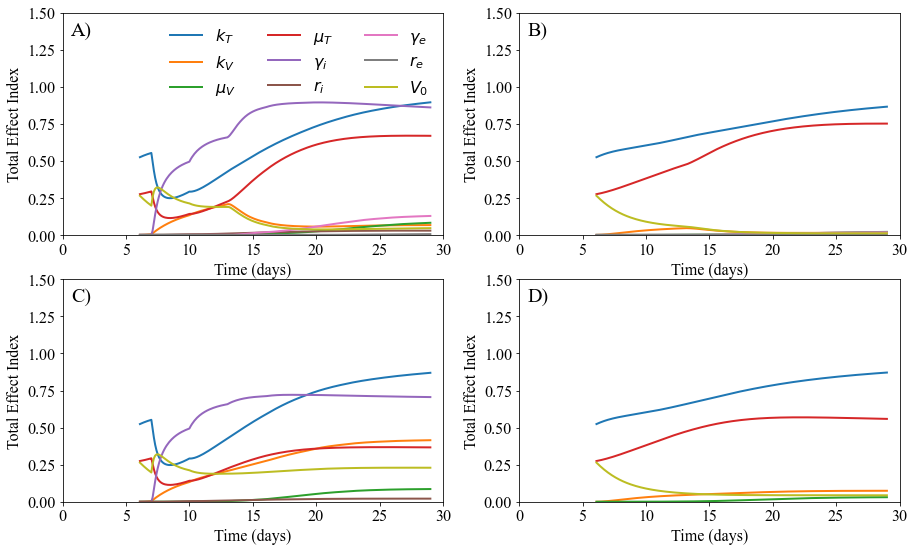

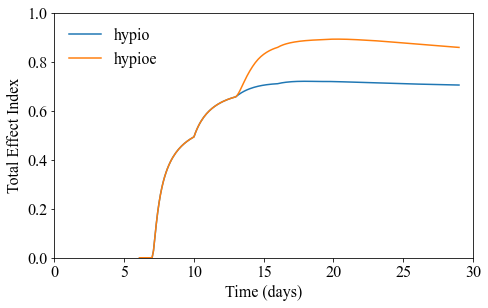

In [9]:
import glob
import time
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.size'] = '16'
plt.rcParams["font.family"] = "Times New Roman"

def read_sa(figure_name='sensitivity_analysis',save=False):
    FilenamesList = sorted(glob.glob('./sa_results_*.txt'))
    apos = [3,1,2,0]
    all_sa = []
    for file in FilenamesList:
        u = np.loadtxt(file)
        all_sa.append(u)
    nCols = 2
    nRows = 2
    lw = 1
    colors = np.arange(9)
    par_labels = ['$k_T$','$k_V$','$\mu_V$','$\mu_T$','$\gamma_i$','$r_i$','$\gamma_e$','$r_e$','$V_0$']
    fig, axes = plt.subplots(ncols=nCols,nrows=nRows,figsize=(7.5*nCols, 4.5*nRows))
    axes.shape = (nCols*nRows)
    time_range = np.loadtxt('./time_range.txt')
    lbl = ['A)','C)','B)','D)']
    for s in range(len(all_sa)):
        print(FilenamesList[s].split('_')[2].split('.')[0])
        temporal_sa = all_sa[s]
        ax = axes[apos[s]]
        ax.text(0.05,0.9,lbl[3-s],horizontalalignment='center',transform=ax.transAxes,fontsize=20)
        if FilenamesList[s].split('_')[2].split('.')[0] == 'control' or FilenamesList[s].split('_')[2].split('.')[0] == 'hypio':
            for p in range(len(temporal_sa)-1):
                ax.plot(time_range,temporal_sa[p],linewidth=2)
            ax.plot(time_range,temporal_sa[p+1],color='C'+str(colors[-1]),linewidth=2)
        elif FilenamesList[s].split('_')[2].split('.')[0] == 'e':
            for p in range(len(temporal_sa)-3):
                ax.plot(time_range,temporal_sa[p],linewidth=2)
            ax.plot(time_range,temporal_sa[p+1],color='C'+str(colors[-3]),linewidth=2)
            ax.plot(time_range,temporal_sa[p+2],color='C'+str(colors[-2]),linewidth=2)
            ax.plot(time_range,temporal_sa[p+3],color='C'+str(colors[-1]),linewidth=2)
        else:
            for p in range(len(temporal_sa)):
                ax.plot(time_range,temporal_sa[p],label=par_labels[p],linewidth=2)
            ax.legend(loc='upper right', fancybox=False, shadow=False, frameon=False,ncol=3)
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Total Effect Index');
        ax.set_xlim((0,30))
        ax.set_ylim((0,1.5))
    if save:
        plt.savefig(figure_name + '.pdf', bbox_inches = 'tight', pad_inches = 0.02)
    plt.show()
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    for s in range(len(all_sa)):
        temporal_sa = all_sa[s]
        p = 4
        if FilenamesList[s].split('_')[2].split('.')[0] == 'control' or FilenamesList[s].split('_')[2].split('.')[0] == 'e':
            continue
        ax.plot(time_range,temporal_sa[p],label=FilenamesList[s].split('_')[2].split('.')[0])
    ax.legend(loc='upper left', fancybox=False, shadow=False, frameon=False)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Total Effect Index');
    ax.set_xlim((0,30))
    ax.set_ylim((0,1))
    if save:
        plt.savefig('gamma.pdf', bbox_inches = 'tight', pad_inches = 0.02)
    plt.show()
    return
read_sa()

hypio


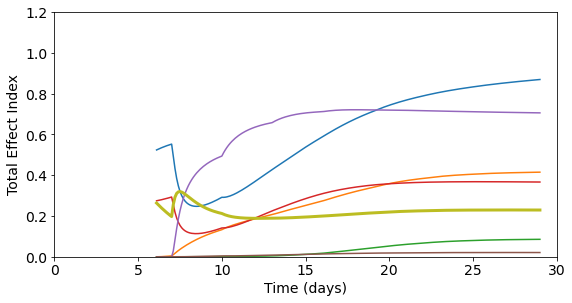

6.1
6.199999999999999
6.299999999999999
6.399999999999999
6.499999999999998
6.599999999999998
6.6999999999999975
6.799999999999997
6.899999999999997
6.9999999999999964
7.099999999999996
7.199999999999996
7.299999999999995
7.399999999999995
7.499999999999995
7.599999999999994
19.299999999999955
19.399999999999952
19.49999999999995
19.59999999999995
19.699999999999953
19.79999999999995
19.89999999999995
19.99999999999995
20.09999999999995
20.19999999999995
20.299999999999947
20.39999999999995
20.49999999999995
20.599999999999948
20.699999999999946
20.799999999999947
20.89999999999995
20.999999999999947
21.099999999999945
21.199999999999946
21.299999999999947
21.399999999999945
21.499999999999943
21.599999999999945
21.699999999999946
21.799999999999944
21.89999999999994
21.999999999999943
22.099999999999945
22.199999999999942
22.29999999999994
22.39999999999994
22.499999999999943
22.59999999999994
22.69999999999994
22.79999999999994
22.89999999999994
22.99999999999994
23.099999999999937
2

In [10]:
import glob
import time
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.size'] = '14'

def read_sa(figure_name='sa',save=True):
    FilenamesList = sorted(glob.glob('./sa_results_hypio.txt'))
    all_sa = []
    for file in FilenamesList:
        u = np.loadtxt(file)
        all_sa.append(u)
    lw = 1
    colors = np.arange(9)
    par_labels = ['$k_T$','$k_V$','$\mu_V$','$\mu_T$','$\gamma_i$','$r_i$','$\gamma_e$','$r_e$','$V_0$']
    fig, axes = plt.subplots(figsize=(9, 4.5))
    time_range = np.loadtxt('./time_range.txt')
    lbl = ['A)','B)','C)','D)']
    lw=3
    for s in range(len(all_sa)):
        print(FilenamesList[s].split('_')[2].split('.')[0])
        temporal_sa = all_sa[s]
        ax = axes
        #ax.text(0.05,0.9,lbl[3-s],horizontalalignment='center',transform=ax.transAxes,fontsize=20)
        if FilenamesList[s].split('_')[2].split('.')[0] == 'control' or FilenamesList[s].split('_')[2].split('.')[0] == 'hypio':
            for p in range(len(temporal_sa)-1):
                ax.plot(time_range,temporal_sa[p])
            ax.plot(time_range,temporal_sa[p+1],color='C'+str(colors[-1]),linewidth=lw)
        elif FilenamesList[s].split('_')[2].split('.')[0] == 'e':
            for p in range(len(temporal_sa)-3):
                ax.plot(time_range,temporal_sa[p])
            ax.plot(time_range,temporal_sa[p+1],color='C'+str(colors[-3]),linewidth=lw)
            ax.plot(time_range,temporal_sa[p+2],color='C'+str(colors[-2]),linewidth=lw)
            ax.plot(time_range,temporal_sa[p+3],color='C'+str(colors[-1]),linewidth=lw)
        else:
            #for p in range(len(temporal_sa)):
            for p in [0,4]:
                ax.plot(time_range,temporal_sa[p],label=par_labels[p],linewidth=lw)
            ax.legend(loc='upper right', fancybox=False, shadow=False, frameon=False,ncol=6)
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Total Effect Index');
        ax.set_xlim((0,30))
        ax.set_ylim((0,1.2))
    if save:
        plt.savefig(figure_name + '.pdf', bbox_inches = 'tight', pad_inches = 0.02)
    plt.show()
    for t in range(len(time_range)):
        if temporal_sa[0][t]>temporal_sa[4][t]:
            print(time_range[t])
    return
read_sa()